# Module 2 Final Project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats import weightstats as stests
from sklearn.linear_model import LinearRegression


In [2]:
kc_house = pd.read_csv("kc_house_data.csv")

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


 # DATA CLEANING AND DATA INSPECTING

In [4]:
kc_house.shape

(21597, 21)

In [5]:
# as I'm doing a solo project i can ignore the following features: date, view, 
# sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
kc_house.drop(["date","view","sqft_above","sqft_basement","yr_renovated","zipcode",
               "lat","long","sqft_living15","sqft_lot15"],axis=1, inplace=True)


In [7]:
kc_house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [8]:
kc_house.shape

(21597, 11)

In [9]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
id             21597 non-null int64
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


1. The variable waterfront has null values

In [10]:
kc_house["waterfront"].isna().sum()

2376

In [11]:
100*kc_house["waterfront"].isna().sum()/len(kc_house)

11.00152798999861

As the 11% of the data have null value for the variable waterfront, I decide to drop then. Even if this percentage could not be low, I prefer to perform my analysis without this null values. 

In [12]:
kc_house.dropna(subset=["waterfront"], inplace=True)

In [13]:
kc_house["waterfront"].isna().sum()

0

## Inspection of the variables 

In [14]:
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


My approach will be to eliminate the outliers from my analysys so I'll check each variable in order to find possible outliers and drop them

In [15]:
kc_house["bedrooms"].value_counts()

3     8721
4     6149
2     2451
5     1441
6      227
1      175
7       35
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Apparently there are few values that I can consider as an outliers: 1 house with 33 bedrooms,1 house with 11 bedrooms, 3 houses with 10 bedrooms.
I decide to filter the bedrooms by <= 11 in order to eliminate the outliers

In [16]:
kc_house = kc_house[kc_house["bedrooms"] <= 11].reset_index(drop=True)
kc_house.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [17]:
kc_house["bathrooms"].describe()

count    19220.000000
mean         2.117092
std          0.769592
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [18]:
kc_house["bathrooms"].value_counts()

2.50    4839
1.00    3411
1.75    2724
2.25    1788
2.00    1722
1.50    1283
2.75    1038
3.00     662
3.50     656
3.25     521
3.75     136
4.00     121
4.50      91
4.25      73
0.75      65
4.75      22
5.00      17
5.25      11
5.50      10
1.25       8
6.00       6
0.50       4
5.75       3
8.00       2
6.25       2
6.75       2
7.75       1
6.50       1
7.50       1
Name: bathrooms, dtype: int64

I consider the houses with more than 6 bedrooms outliers, so then I decide to drop them

In [19]:
kc_house = kc_house[kc_house["bathrooms"] <= 6].reset_index(drop=True)
kc_house.bathrooms.unique()

array([2.25, 1.  , 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       5.75])

In [20]:
kc_house["floors"].value_counts()

1.0    9491
2.0    7344
1.5    1681
3.0     545
2.5     144
3.5       6
Name: floors, dtype: int64

The number of 7 houses with 3.5 floors looks an outlier so I drop them by filtering for floors<3.5

In [21]:
kc_house = kc_house[kc_house["floors"] <= 3.5].reset_index(drop=True)
kc_house.bathrooms.unique()

array([2.25, 1.  , 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       5.75])

## Visualisation of the relationship between the dipendent variable "Price" and the other variables

In [22]:
cols= ["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","condition","grade","yr_built"]

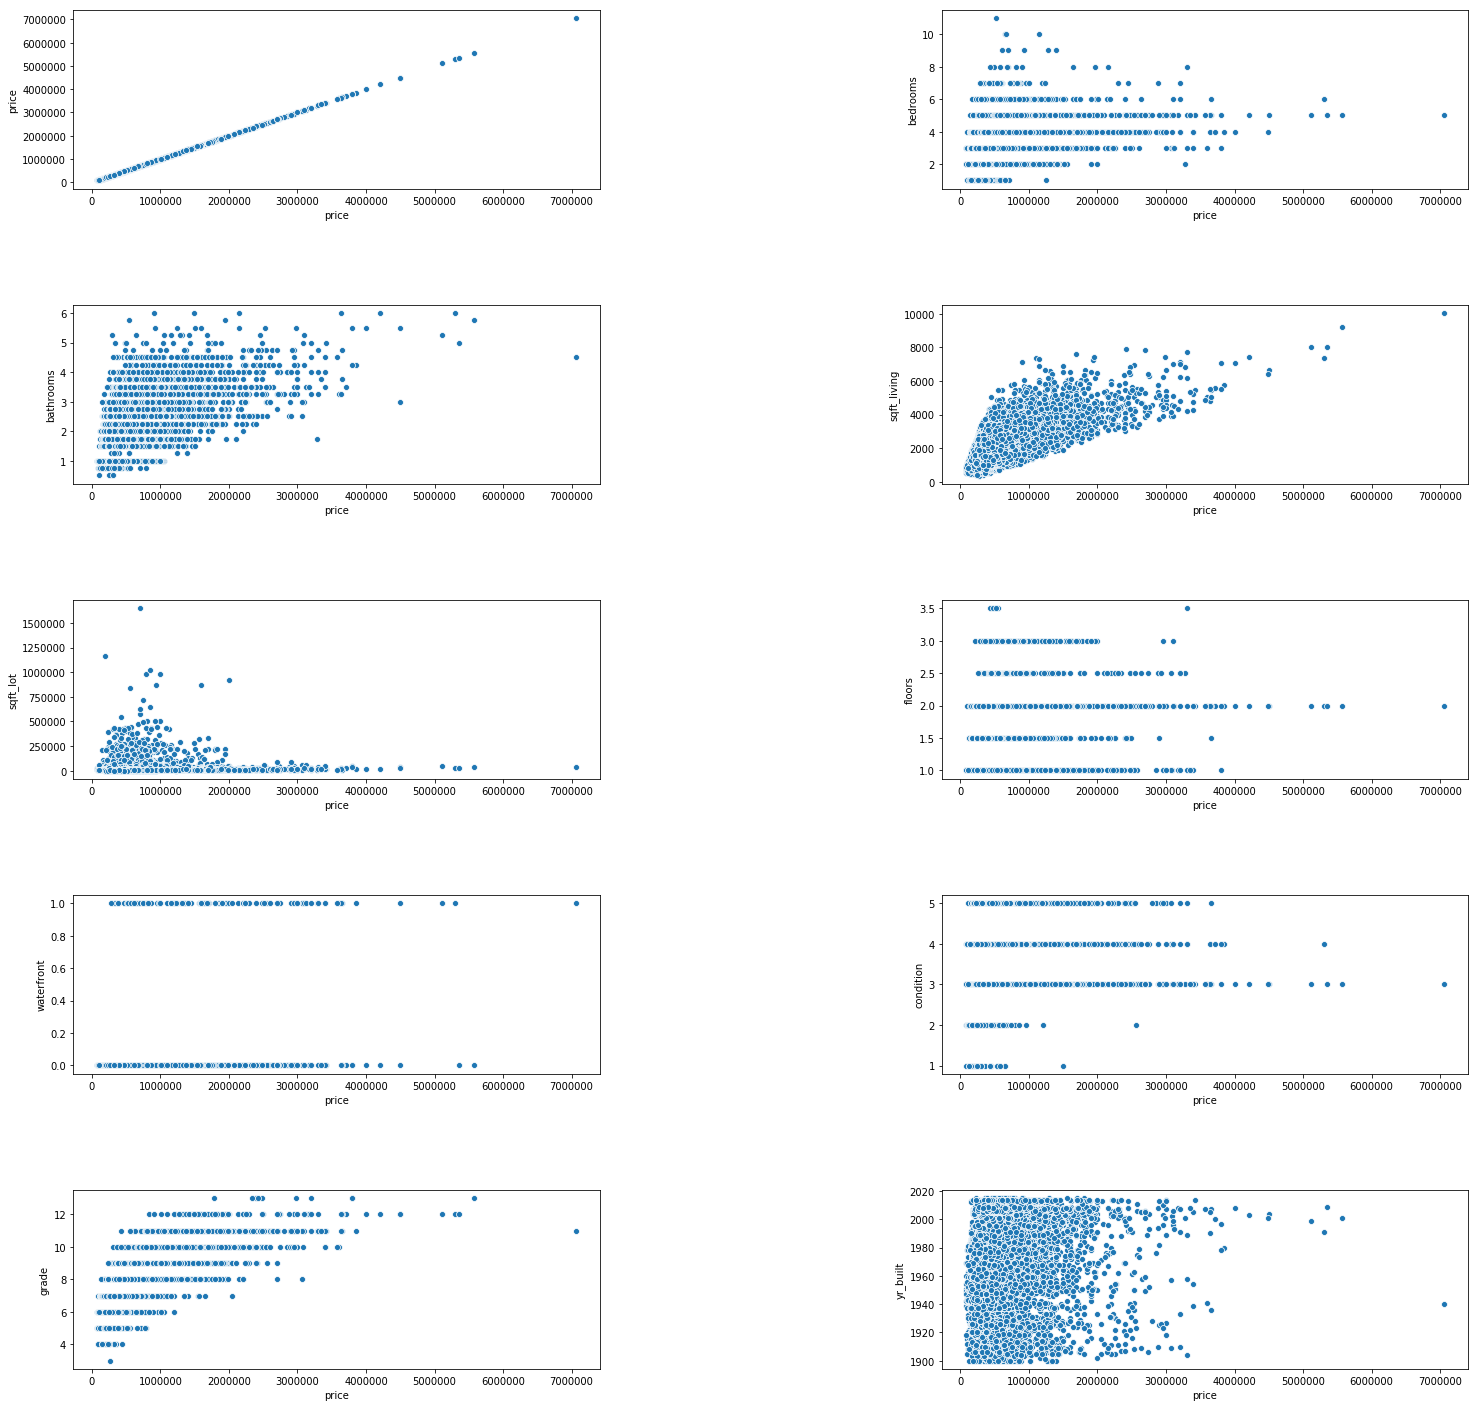

In [23]:
plt.figure(figsize=(25,25))

for i, col in enumerate(cols):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x="price", y=col, data = kc_house)
    plt.subplots_adjust(wspace=0.65, hspace=0.65)
    


## Initial observations

- From the scatterplot is easy to see that some of the variables show some sort of correlation upon the price:
-sqft_living
-sqft_lot
-bedrooms
-bathrooms
-floors
-grade.
In order to understand if this correlation is concrete is necessary to continue with the analysis.


# Baseline Model

In order to get a good sense on how well the model that I'm bulding will work I'm going to use the " train-test-split"

In [24]:
y = kc_house.price.values
X = kc_house.drop("price", axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [26]:
X_cte = sm.add_constant(X_train)
model = sm.OLS(y_train, X_cte)

results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2865.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:17:30   Log-Likelihood:            -2.1078e+05
No. Observations:               15368   AIC:                         4.216e+05
Df Residuals:                   15357   BIC:                         4.217e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.57e+06   1.54e+05     42.671      0.000    6.27e+06    6.87e+06
id          -1.394e-06    6.2e-07     -2.249      0.025   -2.61e-06   -1.79e-07
bedrooms     -4.68e+04   2553.170    -18.329      0.000   -5.18e+04   -4.18e+04
bathrooms    5.145e+04   4118.725     12.491      0.000    4.34e+04    5.95e+04
sqft_living   178.8982      3.947     45.324      0.000     171.161     186.635
sqft_lot       -0.2605      0.044     -5.979      0.000      -0.346      -0.175
floors       2.297e+04   4105.519      5.595      0.000    1.49e+04     3.1e+04
waterfront   7.661e+05   1.99e+04     38.414      0.000    7.27e+05    8.05e+05
condition    1.764e+04   2963.711      5.951      0.000    1.18e+04    2.34e+04
grade        1.301e+05   2556.089     50.885      0.000    1.25e+05    1.35e+05
yr_built    -3773.7579     79.105    -47.706      0.000   -3928.812   -3618.703
==============================================================================
Omnibus:                    10083.846   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           406108.426
Skew:                           2.602   Prob(JB):                         0.00
Kurtosis:                      27.640   Cond. No.                     4.72e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.6388257573518408

From the train-test-split I can see that: 

- with the train data I get an R2 = 0.651. 


- with the test data I get an R2 = 0.639

The R2 for the test is little bit lower but not too much so I can say that the model is not overfitting

## Let's check the correlation between the variables to get an overview about their relationship

In [28]:
corr= kc_house.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,-0.019099,0.005307,0.007275,-0.012163,-0.133216,0.018233,-0.003640,-0.022161,0.007510,0.023290
price,-0.019099,1.000000,0.316964,0.520263,0.699469,0.085693,0.260994,0.277633,0.039762,0.670370,0.054986
bedrooms,0.005307,0.316964,1.000000,0.528407,0.595510,0.028659,0.187893,-0.003278,0.022306,0.369080,0.163304
bathrooms,0.007275,0.520263,0.528407,1.000000,0.751921,0.081578,0.508158,0.064802,-0.126368,0.665580,0.511446
sqft_living,-0.012163,0.699469,0.595510,0.751921,1.000000,0.169693,0.358521,0.107599,-0.056937,0.764839,0.321715
sqft_lot,-0.133216,0.085693,0.028659,0.081578,0.169693,1.000000,-0.008590,0.023345,-0.013727,0.112616,0.055466
floors,0.018233,0.260994,0.187893,0.508158,0.358521,-0.008590,1.000000,0.022558,-0.263410,0.458062,0.490503
waterfront,-0.003640,0.277633,-0.003278,0.064802,0.107599,0.023345,0.022558,1.000000,0.018078,0.085863,-0.026412
condition,-0.022161,0.039762,0.022306,-0.126368,-0.056937,-0.013727,-0.263410,0.018078,1.000000,-0.144313,-0.361824
grade,0.007510,0.670370,0.369080,0.665580,0.764839,0.112616,0.458062,0.085863,-0.144313,1.000000,0.447544


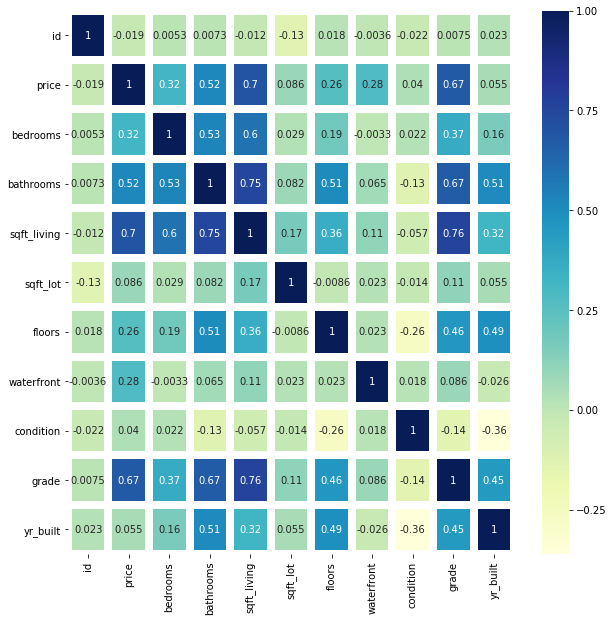

In [29]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data = corr, annot = True, annot_kws = {"size": 10}, linewidth = 7, cmap="YlGnBu")
plt.show()

From the heatmap above I can see that this are the features with the highest correlation : grade, waterfront, floors,sqft_living,bathrooms, bedrooms

By checking the correlation matrix I see that the sqfliving has a strong collinearity with bedrooms, bathrooms 
and grade

I can seen aswell some multicollinearity(0,67) between grade and bathrooms

## Due to this multicoliniarity i' m not going to include the variable sqft_living in my next model

In [30]:
X_train2 = X_train.drop(["sqft_living"], axis=1)


In [31]:
X_cte2 = sm.add_constant(X_train2)
model2 = sm.OLS(y_train, X_cte2)

results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2606.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:17:32   Log-Likelihood:            -2.1174e+05
No. Observations:               15368   AIC:                         4.235e+05
Df Residuals:                   15358   BIC:                         4.236e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.225e+06   1.63e+05     44.264      0.000     6.9e+06    7.54e+06
id         -1.659e-06    6.6e-07     -2.515      0.012   -2.95e-06   -3.66e-07
bedrooms   -2545.1471   2511.868     -1.013      0.311   -7468.707    2378.413
bathrooms   1.287e+05   3991.803     32.252      0.000    1.21e+05    1.37e+05
sqft_lot       0.0509      0.046      1.111      0.266      -0.039       0.141
floors      8771.3748   4358.610      2.012      0.044     227.983    1.73e+04
waterfront  8.443e+05   2.12e+04     39.915      0.000    8.03e+05    8.86e+05
condition   1.963e+04   3155.267      6.220      0.000    1.34e+04    2.58e+04
grade       1.978e+05   2207.186     89.638      0.000    1.94e+05    2.02e+05
yr_built   -4333.7083     83.193    -52.092      0.000   -4496.777   -4170.640
==============================================================================
Omnibus:                    11737.930   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           724107.776
Skew:                           3.139   Prob(JB):                         0.00
Kurtosis:                      36.037   Cond. No.                     4.70e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X_test2 = X_test.drop(["sqft_living"], axis=1)

In [33]:
lin_reg2 = LinearRegression(fit_intercept=True)
lin_reg2.fit(X_train2,y_train)
lin_reg2.score(X_test2,y_test)

0.5941867661513669

From the train-test-split I can see that:

the model is not overfitting becouse the R2 train and the R2 test are similar 

## Check for the Normality Assumption

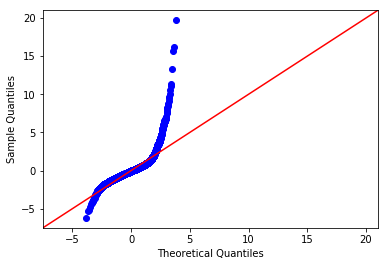

In [34]:
fig = sm.graphics.qqplot(results2.resid, dist=stats.norm, line='45', fit=True)

In the above Q-Q plot I can see that the assumption of normality is not accomplished becouse as is clearly shown in the plot, the residuals aren't normally distributed 

This means that the model mast be improved 

## Check the Homoscedasticity Assumption

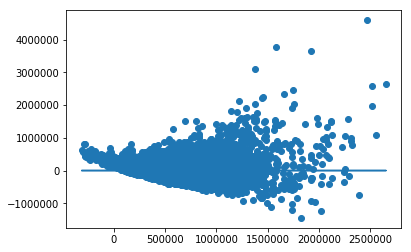

In [35]:
plt.scatter(results2.predict(X_cte2), results2.resid)
plt.plot(results2.predict(X_cte2), [0 for i in range(len(X_cte2))])

From the graph above seems that the assumption of Homoscedasticity is not fulfilled becouse of the funnel shape

## Becouse of multicollinearity I'm going to try to drop grade and sqft_living in my next model

In [36]:
X_train3 = X_train.drop(["grade","sqft_living"], axis=1)

In [37]:
X_cte3 = sm.add_constant(X_train3)
model3 = sm.OLS(y_train, X_cte3)

results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     1266.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:17:37   Log-Likelihood:            -2.1498e+05
No. Observations:               15368   AIC:                         4.300e+05
Df Residuals:                   15359   BIC:                         4.300e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.545e+06   2.01e+05     32.529      0.000    6.15e+06    6.94e+06
id         -1.018e-06   8.14e-07     -1.250      0.211   -2.61e-06    5.78e-07
bedrooms    1.464e+04   3090.927      4.738      0.000    8585.377    2.07e+04
bathrooms     2.8e+05   4464.410     62.725      0.000    2.71e+05    2.89e+05
sqft_lot       0.3970      0.056      7.046      0.000       0.287       0.507
floors      6.838e+04   5316.129     12.862      0.000     5.8e+04    7.88e+04
waterfront  9.892e+05    2.6e+04     38.002      0.000    9.38e+05    1.04e+06
condition   1.804e+04   3893.949      4.632      0.000    1.04e+04    2.57e+04
yr_built   -3458.8203    101.962    -33.923      0.000   -3658.678   -3258.962
==============================================================================
Omnibus:                    10316.081   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347108.270
Skew:                           2.758   Prob(JB):                         0.00
Kurtosis:                      25.620   Cond. No.                     4.70e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_test3 = X_test.drop(["grade","sqft_living"], axis=1)

In [39]:
lin_reg3 = LinearRegression(fit_intercept=True)
lin_reg3.fit(X_train3,y_train)
lin_reg3.score(X_test3,y_test)

0.3691832712879076

From the train-test-split I can see that:

the model is not overfitting becouse the R2 train and the R2 test are similar 

# Business Questions:

## 1 - As grade and bathrooms show multicollinearity, which is the most significant variable in predicting the price?

I create a 4th model dropping bathrooms and the sqft_living


In [40]:
X_train4 = X_train.drop(["bathrooms","sqft_living"], axis=1)

In [41]:
X_cte4 = sm.add_constant(X_train4)
model4 = sm.OLS(y_train, X_cte4)

results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2625.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:17:38   Log-Likelihood:            -2.1225e+05
No. Observations:               15368   AIC:                         4.245e+05
Df Residuals:                   15359   BIC:                         4.246e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.593e+06    1.6e+05     34.882      0.000    5.28e+06    5.91e+06
id         -1.604e-06   6.82e-07     -2.352      0.019   -2.94e-06   -2.67e-07
bedrooms    3.242e+04   2341.333     13.845      0.000    2.78e+04     3.7e+04
sqft_lot       0.1079      0.047      2.281      0.023       0.015       0.201
floors      4.256e+04   4371.629      9.735      0.000     3.4e+04    5.11e+04
waterfront  8.849e+05   2.18e+04     40.555      0.000    8.42e+05    9.28e+05
condition   2.713e+04   3251.387      8.345      0.000    2.08e+04    3.35e+04
grade       2.279e+05   2066.759    110.291      0.000    2.24e+05    2.32e+05
yr_built   -3584.0658     82.539    -43.423      0.000   -3745.851   -3422.280
==============================================================================
Omnibus:                    12074.499   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           764451.860
Skew:                           3.278   Prob(JB):                         0.00
Kurtosis:                      36.924   Cond. No.                     4.47e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## - Three coefficents explanations

1. From the summary of my 4th model I'll explain the following coefficents for: bedrooms, floors and yr_built:

-Taking in cosideration the variable "bedrooms" and keeping the other variables constant, the coefficient of 3.242e+04 means that for every bedroom add in the house the Price is incresing by 3.242e+04. 

-Taking in cosideration the variable "floors" and keeping the other variables constant, the coefficient of 4.256e+044 means that for every floor add in the house the Price is incresing by 4.256e+04. It seems that by adding a floor the impact on the price is greater than by adding a beedroom

-Last variable is the "yr_built". The coefficient for this variable is negative -3584.0658. This mean that this variable has a negative impact on the price by decrisin the price of -3584.0658

In [44]:
X_test4 = X_test.drop(["bathrooms","sqft_living"], axis=1)

In [45]:
lin_reg4 = LinearRegression(fit_intercept=True)
lin_reg4.fit(X_train4, y_train)
lin_reg4.score(X_test4, y_test)

0.5703402881579495

- Answer: Grade does have a more significant impact on the price than the Bathrooms becouse by dropping from the model the variable Bathroom the R2 is bigger(0,57) then dropping from the model the variable Grade ( R2 = 0, 369)

 - This means that the most accurate model for predicting the price is the one that drops the variable Bathrooms and not the variable Grade 

## 2 - Does having a waterfront in the house has a positive impact in the price?

In [46]:
kc_house["waterfront"].value_counts()

0.0    19066
1.0      145
Name: waterfront, dtype: int64

In [47]:
water_1 = kc_house[kc_house["waterfront"] == 1]


In [48]:
water_1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
45,822039084,1350000.0,3,2.50,2753,65005,1.0,1.0,5,9,1953
205,8096000060,655000.0,2,1.75,1450,15798,2.0,1.0,3,7,1915
221,2025069065,2400000.0,4,2.50,3650,8354,1.0,1.0,3,9,2000
238,2123039032,369900.0,1,0.75,760,10079,1.0,1.0,5,5,1936
268,3225069065,3080000.0,4,5.00,4550,18641,1.0,1.0,3,10,2002


In [49]:
water_0 = kc_house[kc_house["waterfront"] == 0]

In [50]:
water_0.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
1,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
2,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


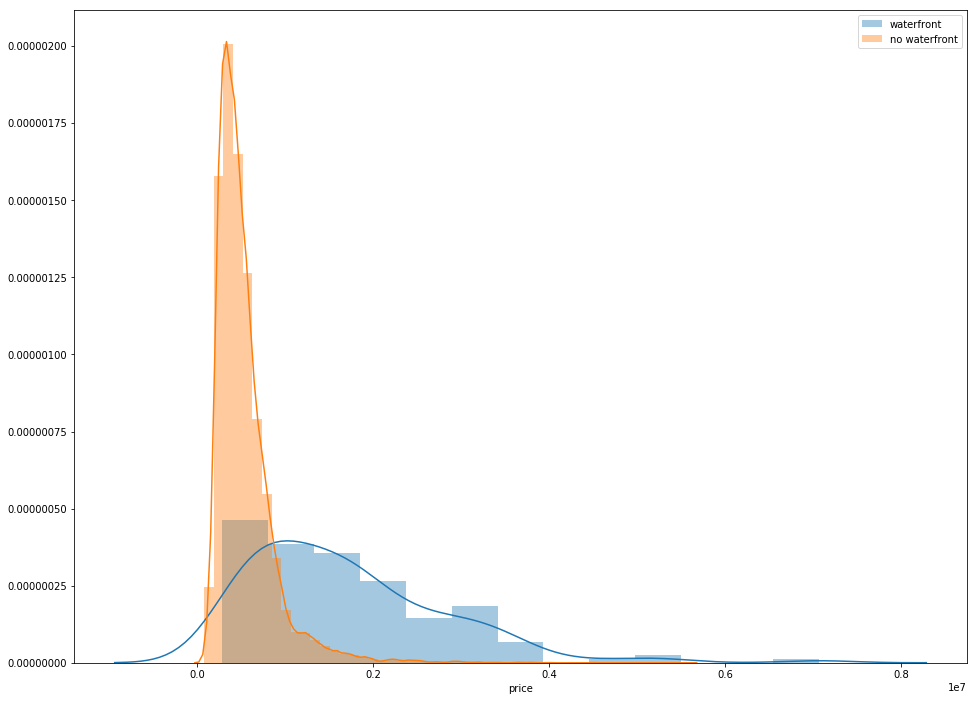

In [51]:
plt.figure(figsize=(16,12))
sns.distplot(water_1["price"], label="waterfront")
sns.distplot(water_0["price"], label="no waterfront")
plt.legend()
plt.show()


- Answer: Is pretty clear from the visualisation above that the the houses with waterfront are more to the right:   this means that they have a positive impact on the price than the houses wihtout waterfront 

No handles with labels found to put in legend.


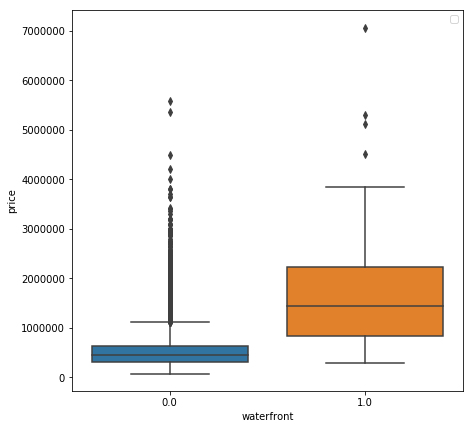

In [52]:
plt.figure(figsize=(7,7))
sns.boxplot(x="waterfront", y="price", data=kc_house)
plt.legend()
plt.show()



## Z-Test

Let's use the z-test in order to verify if my assumption is correct

In [53]:
# h0= there is no difference between waterfront and no waterfront
# h1= the mean price for waterfront in significantly grater than the mean price for no waterfront

In [54]:
ztest ,pval = stests.ztest(x1=water_1["price"], x2=water_0["price"], alternative="larger", value=0)

print("the p value is:", float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

the p value is: 0.0
reject null hypothesis


The result of the test is that the null hypothesis is rejected becouse the p value is 0, less than the α = 0.05  
With a p value = 0 I can say that the waterfront as a significant impact on the price

## 3- How does compare the houses built before 1975 and after 1975 upon the price?

In [55]:
kc_house["yr_built"].median()

1975.0

The average number of houses were built in 1975, from this data I can start my analysis

In [56]:
yr_built0 = kc_house[kc_house["yr_built"] <= 1975]
yr_built1 = kc_house[kc_house["yr_built"] > 1975]


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


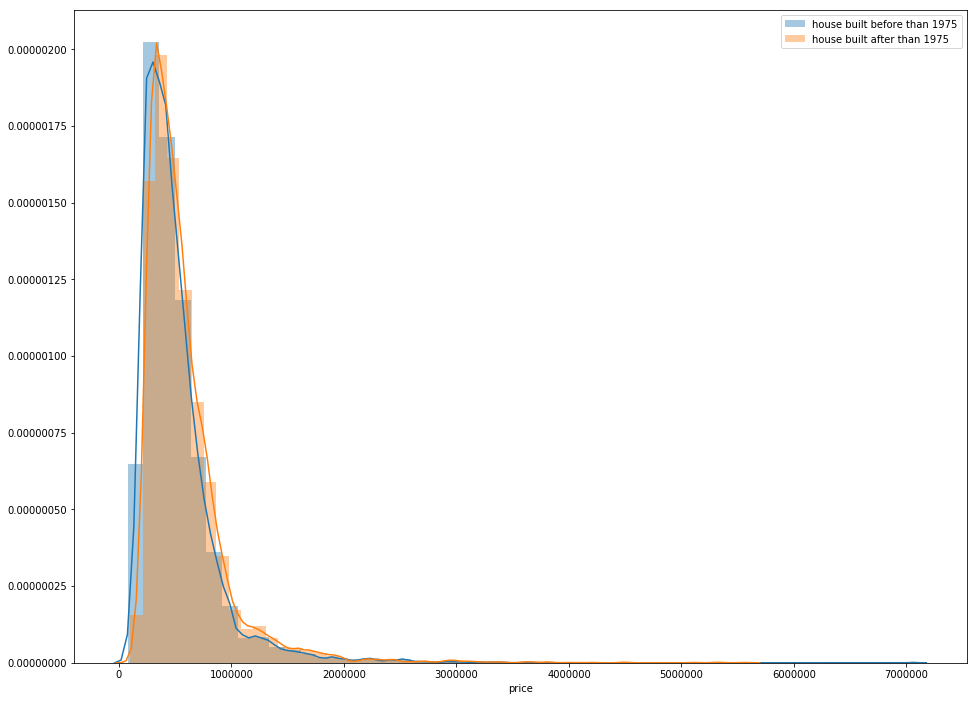

In [57]:
plt.figure(figsize=(16,12))
sns.distplot(yr_built0["price"], label="house built before than 1975")
sns.distplot(yr_built1["price"], label="house built after than 1975")
plt.legend()
plt.show()


Seems there the houses built after 1975 are sligtly more expensive but the difference is not much. The reason of this difference being so small could be due to the survival bias on the houses built before 1975 because the ones that are still in use are really likely to be the best ones before 1975, the ones that survived after 50 years. In the other hand, for the houses bult after 1975 we have a better rappresentation of the population: the good houses and the bad houses, becouse they haven't have the challenge of surviving for 50 years.

In [58]:
kc_house["1975"] = kc_house["yr_built"] <= 1975
kc_house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,1975
0,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,True
1,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,True
2,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,True
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,False
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,False


No handles with labels found to put in legend.


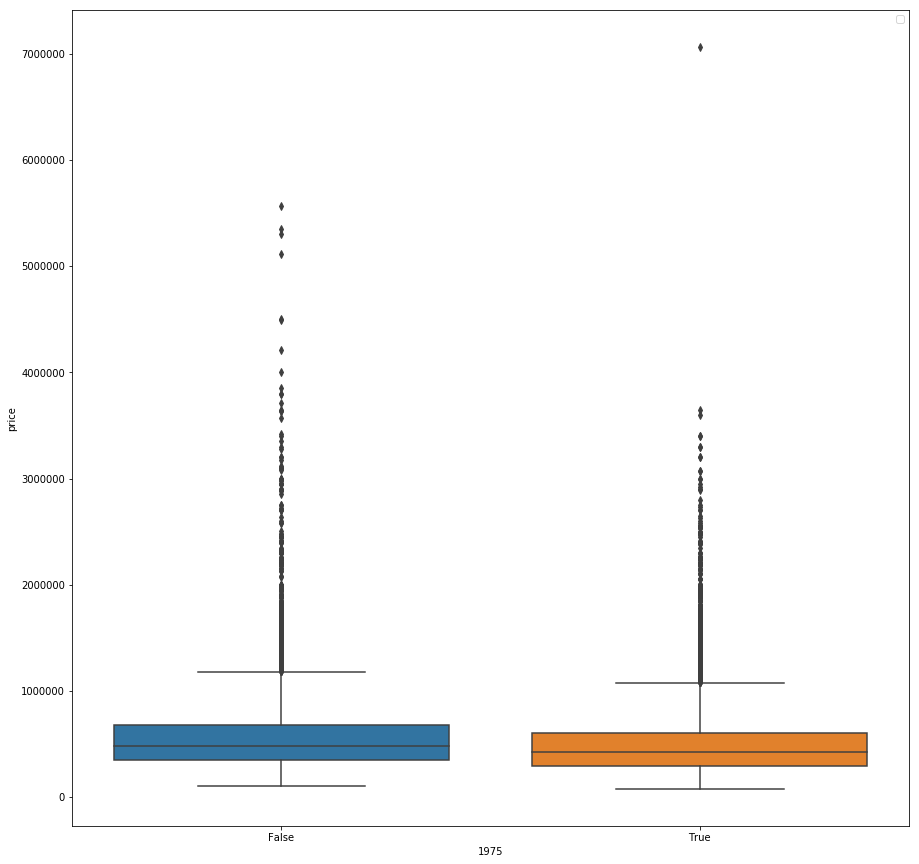

In [59]:
plt.figure(figsize=(15,15))
sns.boxplot("1975", "price", data=kc_house)
plt.legend()
plt.show()


## Z - test

Let's use the z-test in order to verify if my assumption is correct

In [60]:
# h0= there is no difference between the price of houses built before 1975 and after 1975
# h1= the mean price for the houses built after 1975 in significantly grater than the mean price for the houses built before 1975

In [61]:
ztest ,pval = stests.ztest(x1=yr_built1["price"], x2=yr_built0["price"], alternative="larger", value=0)

print("the p value is:", float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

the p value is: 3.153445433804449e-39
reject null hypothesis


The result of the test is that the null hypothesis is rejected becouse the p value is 0.332^-38, less than the α = 0.05  
With a p value = 0.332^-38 I can accept the alternative hp.